# NLP and Text Mining - NLP Mini Project 

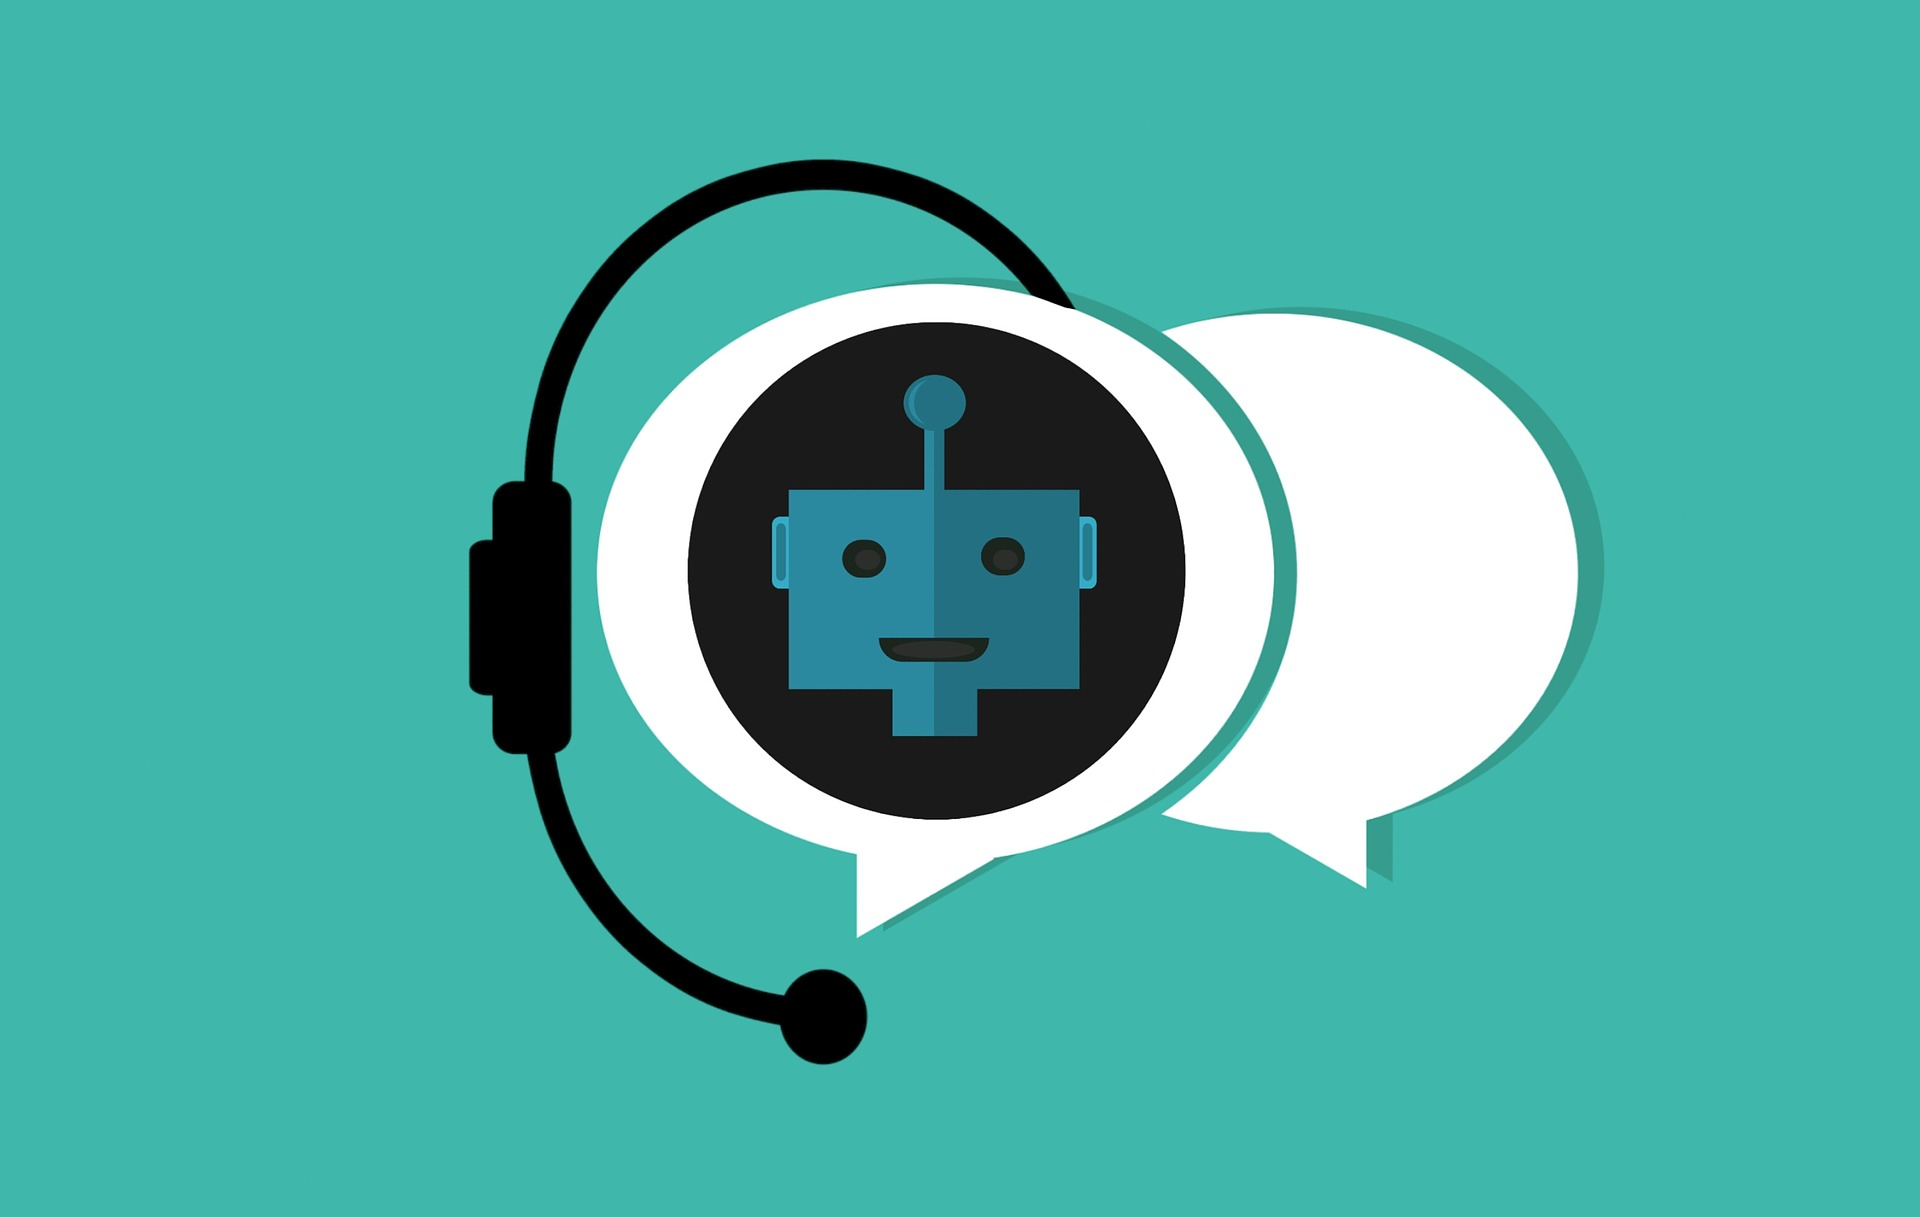

# Project Name : NLP Chat Bot
# Developer: Darshana Dahanayake 


In [ ]:
!pip install nltk

In [2]:
!pip install wikipedia

  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11695 sha256=93b641ea145b60b1592002a101c10a19dd8dad639b7149c6eb8b86ec1a3c4f65
  Stored in directory: /root/.cache/pip/wheels/15/93/6d/5b2c68b8a64c7a7a04947b4ed6d89fb557dcc6bc27d1d7f3ba
Successfully built wikipedia


In [143]:
!pip install gTTS

In [75]:
import nltk
import random
import string
import warnings
import wikipedia


In [82]:
from gtts import gTTS
from IPython.display import Audio


In [60]:
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
#result = wikipedia.search("Machine Learning")
search_term = "Artificial Interlligence"
search_term = search_term.lower()
result = wikipedia.summary(search_term, auto_suggest=True, redirect=True)
print(result)
rawData = wikipedia.page(result[0]).summary
rawData = rawData.lower()

sentTokenz = nltk.sent_tokenize(rawData)
print(sentTokenz)


In [62]:
#In order to incorporate TXT file as the corpus, we could use following code.

#warnings.filterwarnings('ignore')
#f = open('/content/Act1Scene1.txt', 'r', errors='ignore')
#raw = f.read()
#raw = raw.lower()

#sent_tokens = nltk.sent_tokenize(raw)
#word_tokens = nltk.word_tokenize(raw)

#sentTokens = sent_tokens[:4]
#print(sentTokens)
#wordTokens = word_tokens[:4]
#print(wordTokens)




In [118]:
#getting wiki corpuses
def getWiki(searchtxt):  
  #result = wikipedia.search(searchtxt, results=1, suggestion=False)
  #rawData = wikipedia.page(result).summary
  result = wikipedia.summary(searchtxt, sentences=2, auto_suggest=True, redirect=True)
  rawData = result 
  rawData = rawData.lower()
  sentTokenz = nltk.sent_tokenize(rawData)
  return sentTokenz

In [144]:
tts = gTTS("My name is DD. I'm a bot and happy to help you.")
tts.save('voice.wav') 
sound_file = 'voice.wav'
Audio(sound_file, autoplay=True)

In [146]:
def textToSpeech(txt):
  txt = str(txt)
  tts = gTTS(txt)
  tts.save('voice.wav') 
  sound_file = 'voice.wav'
  Audio(sound_file)

In [65]:
#preprocessing
lemmer = nltk.stem.WordNetLemmatizer()
def LemTokens(tokens):
    return [lemmer.lemmatize(token) for token in tokens]

In [66]:
remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)

In [67]:
def LemNormalize(text):
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))

In [68]:
#Greetings
GREETING_INPUTS = ("hello", "hi", "greetings", "aubowan", "what's up", "hey")
GREETING_RESPONSES = ["hi", "hey", "great!", "hi there", "hello", "I am glad! you are talking to me"]

In [69]:
def greeting(scentence):
    
    for word in scentence.split():
        if word.lower() in GREETING_INPUTS:
            return random.choice(GREETING_RESPONSES)

In [70]:
#Vectorizer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [71]:
def response(user_response):
    chatbot_response = ''
    sent_tokens = getWiki(user_response)
    sent_tokens.append(user_response)
    #TfidfVec = TfidfVectorizer(tokenizer=LemNormalize, stop_words="english")
    TfidfVec = TfidfVectorizer(tokenizer=LemNormalize)
    tfidf = TfidfVec.fit_transform(sent_tokens)
    vals = cosine_similarity(tfidf[-1], tfidf)
    idx = vals.argsort()[0][-2]
    flat = vals.flatten()
    flat.sort()
    req_tfidf = flat[-2]
    if(req_tfidf == 0):
        chatbot_response = chatbot_response + "I am sorry! I don't understand you"
        return chatbot_response
    
    else:
        chatbot_response=chatbot_response+sent_tokens[idx]
        return chatbot_response

In [142]:
flag = True
print ("Hello, there my name is DD. I will answer your queries. If you want to exit, type Bye!")
while(flag==True):
  user_response = input()
  user_response = user_response.lower()
  if(user_response!='bye'):
      if user_response == 'thanks' or user_response == 'thank you':
        flag = False
        print("DD: You're welcome!")
      else:
        if(greeting(user_response)!=None):
          print("DD:" +greeting(user_response))
        else:
          print("DD: ", end='')
          res = response(user_response)
          print(res+'\n')
          
          
  else:
      flag = False
      print("DD: Bye! Have a great time!" )

Hello, there my name is DD. I will answer your queries. If you want to exit, type Bye!
Hi
DD:hi
how stars have formed ?
DD: how i met your father is an american sitcom created by isaac aptaker and elizabeth berger which premiered on hulu on january 18, 2022. it is a standalone sequel to how i met your mother.

Galaxy
DD: a galaxy is a gravitationally bound system of stars, stellar remnants, interstellar gas, dust, and dark matter.

Big bang
DD: big bands originated during the early 1910s and dominated jazz in the early 1940s when swing was most popular.



KeyboardInterrupt: ignored